# Introduction

This project focuses on developing a machine learning model for classifying text messages as either depressed or not depressed based on a set of predetermined keywords. By training the model on a dataset of text messages containing stemmed keywords associated with depression, we aim to accurately predict whether a given message reflects depressive sentiments. This project addresses the growing need for automated tools to identify and provide support for individuals experiencing mental health issues through text-based communication. By leveraging natural language processing techniques and machine learning algorithms, our model offers a scalable and efficient solution for detecting depressive language patterns in real-time, contributing to early intervention and support efforts in mental health care.

# Importing

In [2]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Outline

In [3]:
data = pd.read_excel('dataset.xlsx')

In [4]:
data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [6]:
data.sample(5)

,text,label
346,"I get traumatized. when he was a child, he was...",1.0
6637,Can you raise HT?,0.0
3928,Q PASO CON JYP,0.0
5300,This hand is so sinful,0.0
1682,We love messi & maradona,0.0


In [5]:
#Printing the shape of the data
print(data.shape)

(6982, 2)


In [6]:
#Checking whether a feathers contains null values or not
data.isnull().sum()

text     10
label     2
dtype: int64

In [7]:
#This specifies that any row containing at least one missing value (NaN) should be dropped.
data=data.dropna(how='any')

In [8]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
#Checking the duplicated value in the dataset
data.duplicated().sum()

77

In [10]:
#This method removes duplicate rows from the DataFrame data. 
#By default, it keeps the first occurrence of each duplicated row and removes subsequent occurrences.
data=data.drop_duplicates(keep='first')

In [11]:
data.duplicated().sum()

0

In [12]:
#This line of code is used to count the occurrences of each unique value in the 'label' column of the DataFrame data
data['label'].value_counts()

label
0.0    6181
1.0     712
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

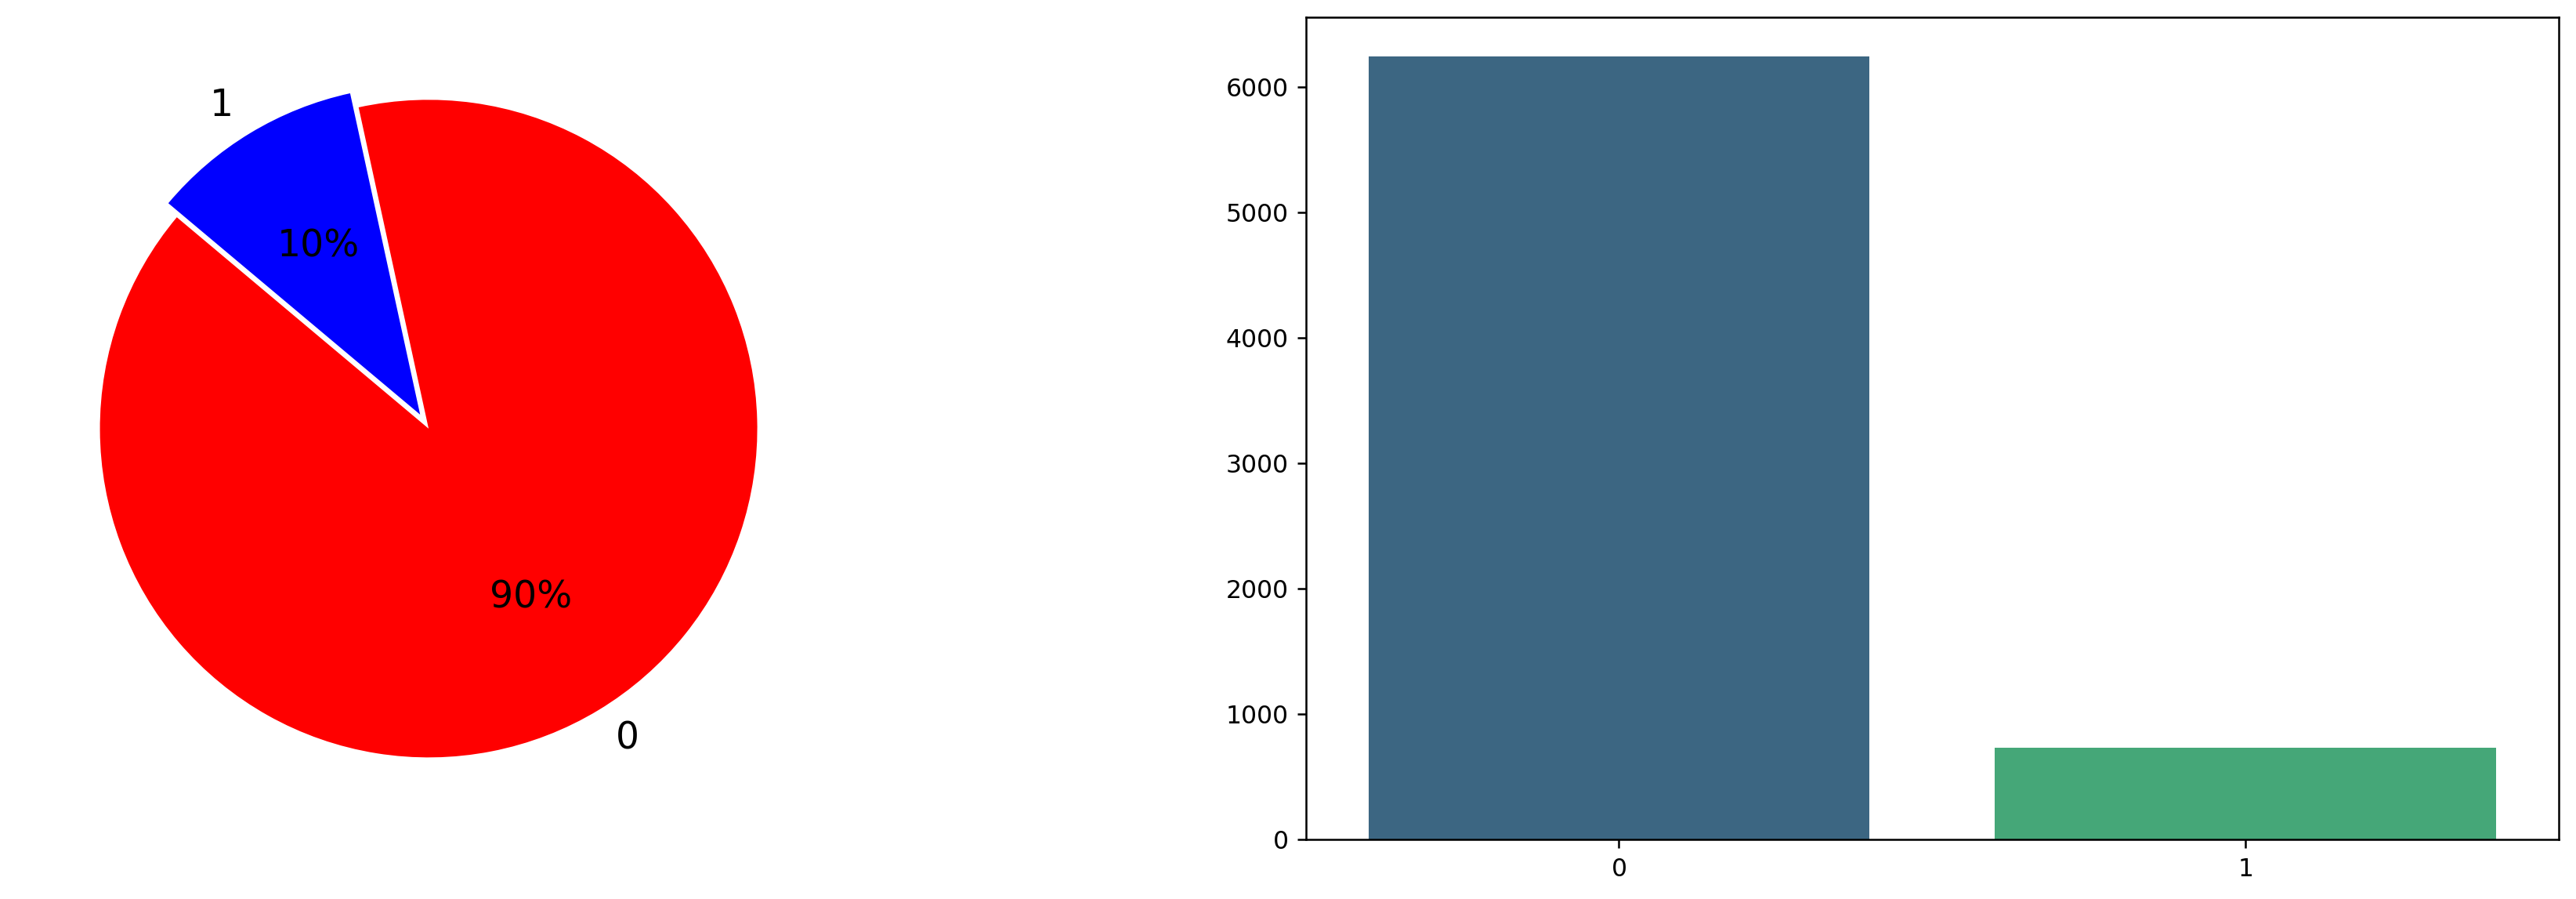

In [14]:
# This line creates a list labels containing two elements, 0 and 1.
labels = [0,1] 

# This line creates a list sizes containing the sizes corresponding to each label
sizes = [6240, 730]

# This line creates a list custom_colours containing hexadecimal color codes for each label. 
# These colors will be used in the pie chart.
custom_colours = ['red', 'blue']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

# Features Engineering

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SURAJ KUMAR
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Counting the number of character in each message and storing it in a new column called
# num_characters
data['Total Characters'] = data['text'].apply(len)

In [18]:
data.head()

,text,label,Total Characters
0,oh my gosh,1.0,10
1,"trouble sleeping, confused mind, restless hear...",1.0,64
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78
3,I've shifted my focus to something else but I'...,1.0,61
4,"I'm restless and restless, it's been a month n...",1.0,72


In [19]:
# Counting the number of words in each messages and storing it in a new column called num_word
data['Total Words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
data.head()

,text,label,Total Characters,Total Words
0,oh my gosh,1.0,10,3
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17
3,I've shifted my focus to something else but I'...,1.0,61,13
4,"I'm restless and restless, it's been a month n...",1.0,72,20


In [21]:
data[['Total Characters', 'Total Words']].describe()

,Total Characters,Total Words
count,6893.000000,6893.000000
mean,68.900914,15.412883
std,59.197312,13.283959
min,3.000000,1.000000
25%,27.000000,6.000000
50%,51.000000,12.000000
75%,91.000000,20.000000
max,371.000000,92.000000


In [22]:
data[data['label']== 0.0][['Total Characters','Total Words']].describe()

,Total Characters,Total Words
count,6181.000000,6181.000000
mean,66.863776,14.929785
std,58.028477,12.972011
min,3.000000,1.000000
25%,26.000000,6.000000
50%,50.000000,11.000000
75%,88.000000,20.000000
max,371.000000,92.000000


In [23]:
data[data['label']== 1.0][['Total Characters','Total Words']].describe()

,Total Characters,Total Words
count,712.000000,712.000000
mean,86.585674,19.606742
std,65.961639,15.108324
min,7.000000,1.000000
25%,36.000000,8.000000
50%,69.500000,16.000000
75%,115.000000,26.000000
max,327.000000,84.000000


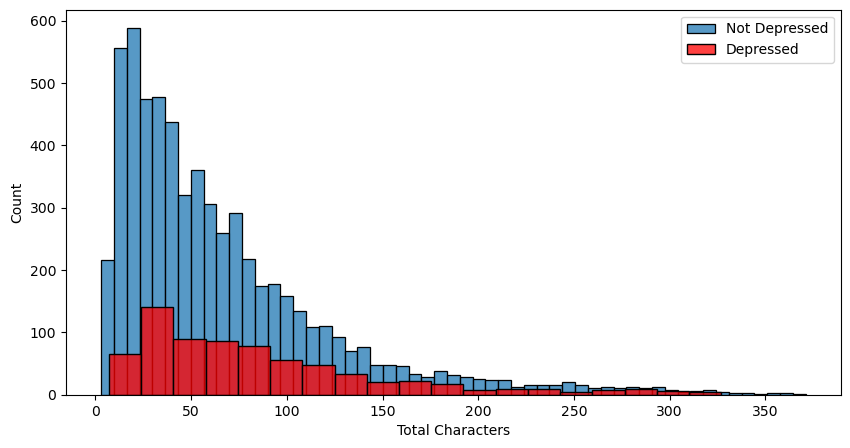

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['label'] == 0.0]['Total Characters'],label='Non Depressing')
sns.histplot(data[data['label'] == 1.0]['Total Characters'],color='red',label='Depressing')
plt.legend()
plt.show()

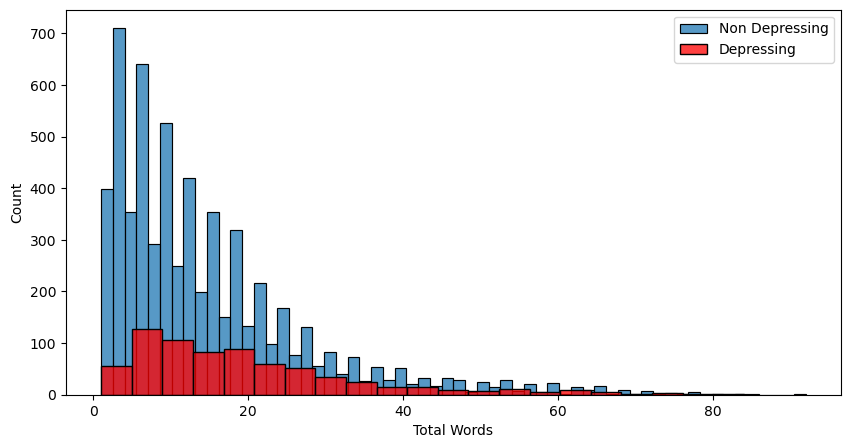

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['label'] == 0.0]['Total Words'],label='Non Depressing')
sns.histplot(data[data['label'] == 1.0]['Total Words'],color='red',label='Depressing')
plt.legend()
plt.show()

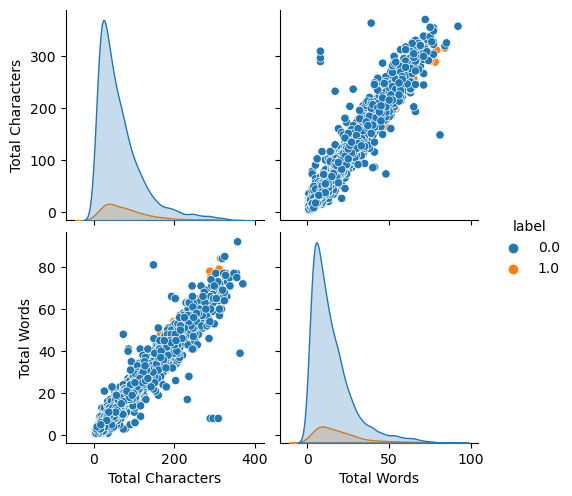

In [26]:
sns.pairplot(data,hue='label')
plt.show()

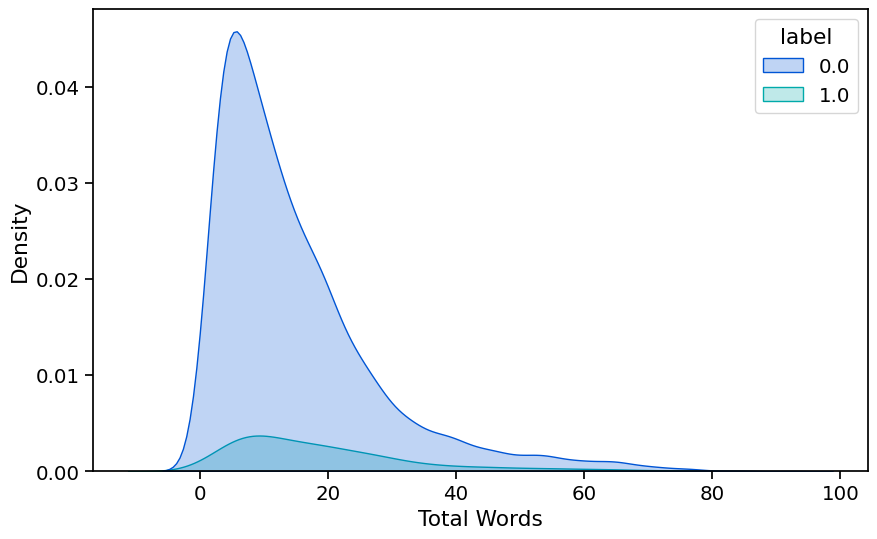

In [143]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

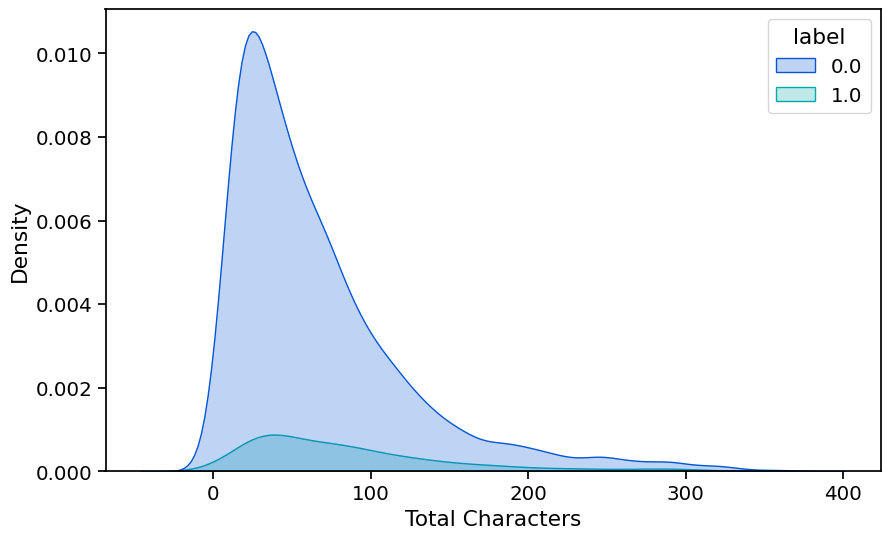

In [144]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Characters'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

# Text Preprocessing

In [205]:
data.head()

,text,label,Total Characters,Total Words
0,oh my gosh,1.0,10,3
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17
3,I've shifted my focus to something else but I'...,1.0,61,13
4,"I'm restless and restless, it's been a month n...",1.0,72,20


In [32]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [33]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    re_url = re.compile('https?://\S+|www\.\S+')
    text = re_url.sub('', text)
    
    # Remove punctuation
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    
    # Perform stemming
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    text = ' '.join(stemmed_words)
    
    return text


In [34]:
data['text']=data['text'].apply(preprocess_text)

In [35]:
data['text'].head(0)

Series([], Name: text, dtype: object)

In [36]:
data.head()

,text,label,Total Characters,Total Words
0,oh gosh,1.0,10,3
1,troubl sleep confus mind restless heart tune,1.0,64,13
2,wrong back dear forward doubt stay restless re...,1.0,78,17
3,ive shift focu someth els im still worri,1.0,61,13
4,im restless restless month boy mean,1.0,72,20


In [37]:
#This line of code computes the natural logarithm of the total number of words in each text in the 'text' column of a DataFrame, and stores the result in a new column called 'Total Words After Transformation'. 
#It can be useful for analyzing the distribution or statistical properties of the word counts in the text data.
data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

In [38]:
data.head()

,text,label,Total Characters,Total Words,Total Words After Transformation
0,oh gosh,1.0,10,3,0.693147
1,troubl sleep confus mind restless heart tune,1.0,64,13,1.945910
2,wrong back dear forward doubt stay restless re...,1.0,78,17,2.197225
3,ive shift focu someth els im still worri,1.0,61,13,2.079442
4,im restless restless month boy mean,1.0,72,20,1.791759


# Visualization

In [39]:
from wordcloud import WordCloud
from collections import Counter

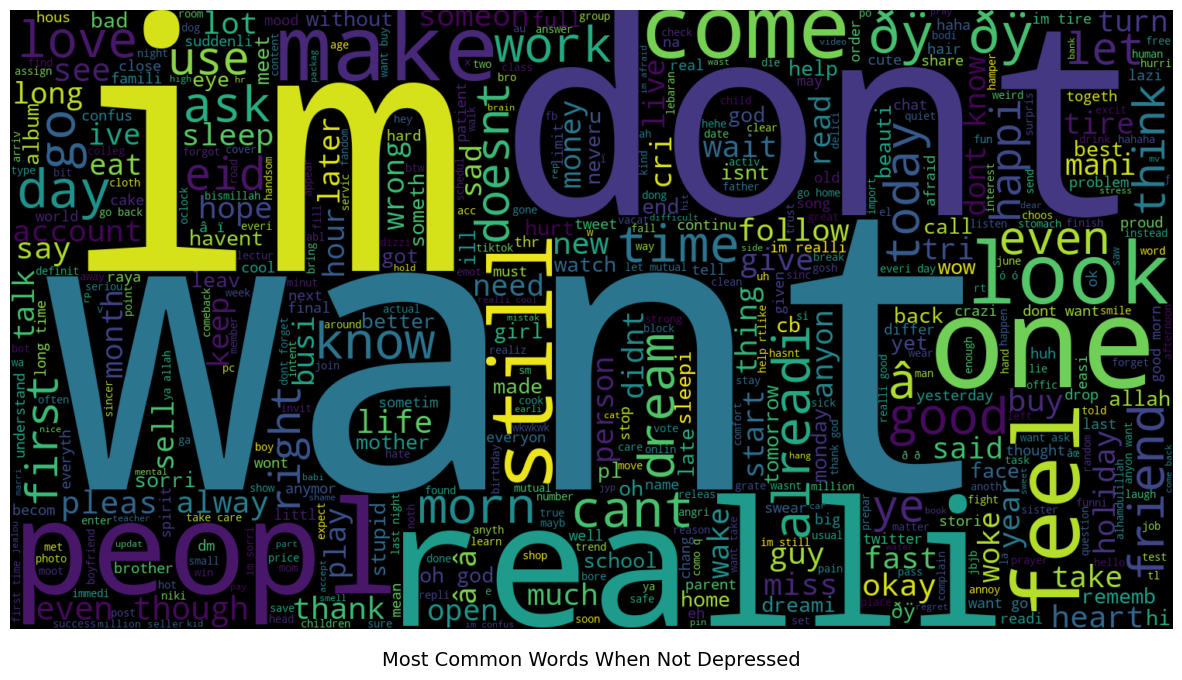

In [53]:
#This code snippet combines text data from the DataFrame
#where the label is equal to 0, generates a word cloud visualization from the combined text, and then displays the word cloud using Matplotlib. The word cloud visually 
#represents the most frequent words in the combined text data
text = " ".join(data[data['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# Adding label at the bottom
plt.text(0.5, -0.05, 'Most Common Words When Not Depressed', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
plt.show()

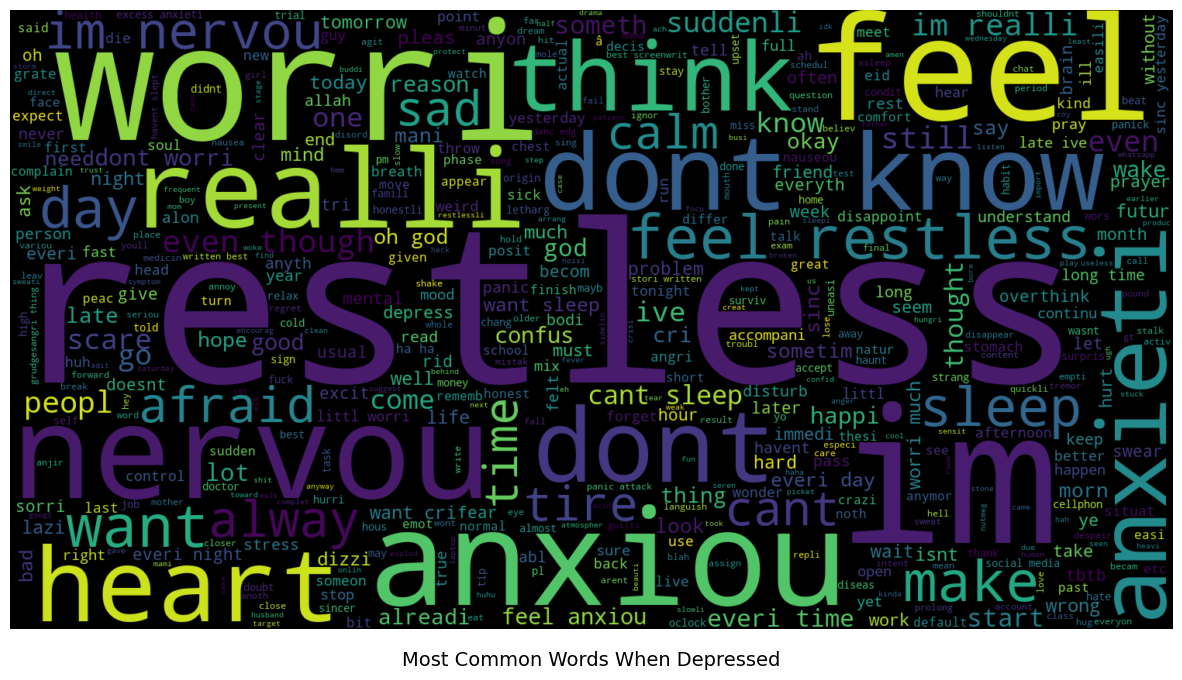

In [52]:
# this code snippet combines text data from the DataFrame where the label is equal to 1, generates a word cloud visualization from 
#the combined text, and then displays the word cloud using Matplotlib. 
#The word cloud visually represents the most frequent words in the combined text data
text = " ".join(data[data['label'] == 1]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# Adding label at the bottom
plt.text(0.5, -0.05, 'Most Common Words When Depressed', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)

plt.show()

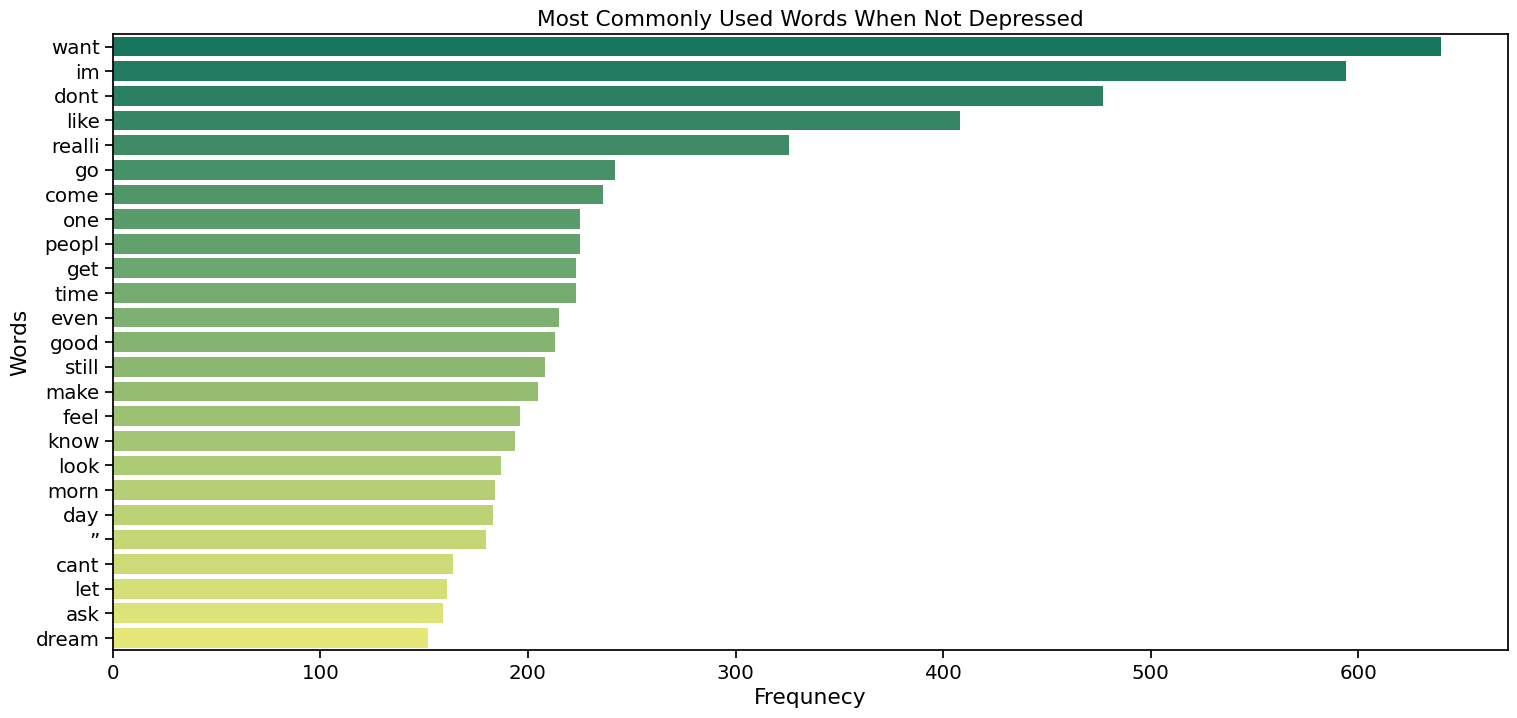

In [42]:
#This code snippet analyzes the text data where the label is equal to 0, identifies the most 
#common words, and visualizes their frequencies using a bar plot. 
#It provides insights into the most frequently used words when individuals are not depressed.
all_nodep_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Common Words in a Non Depressing Message")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

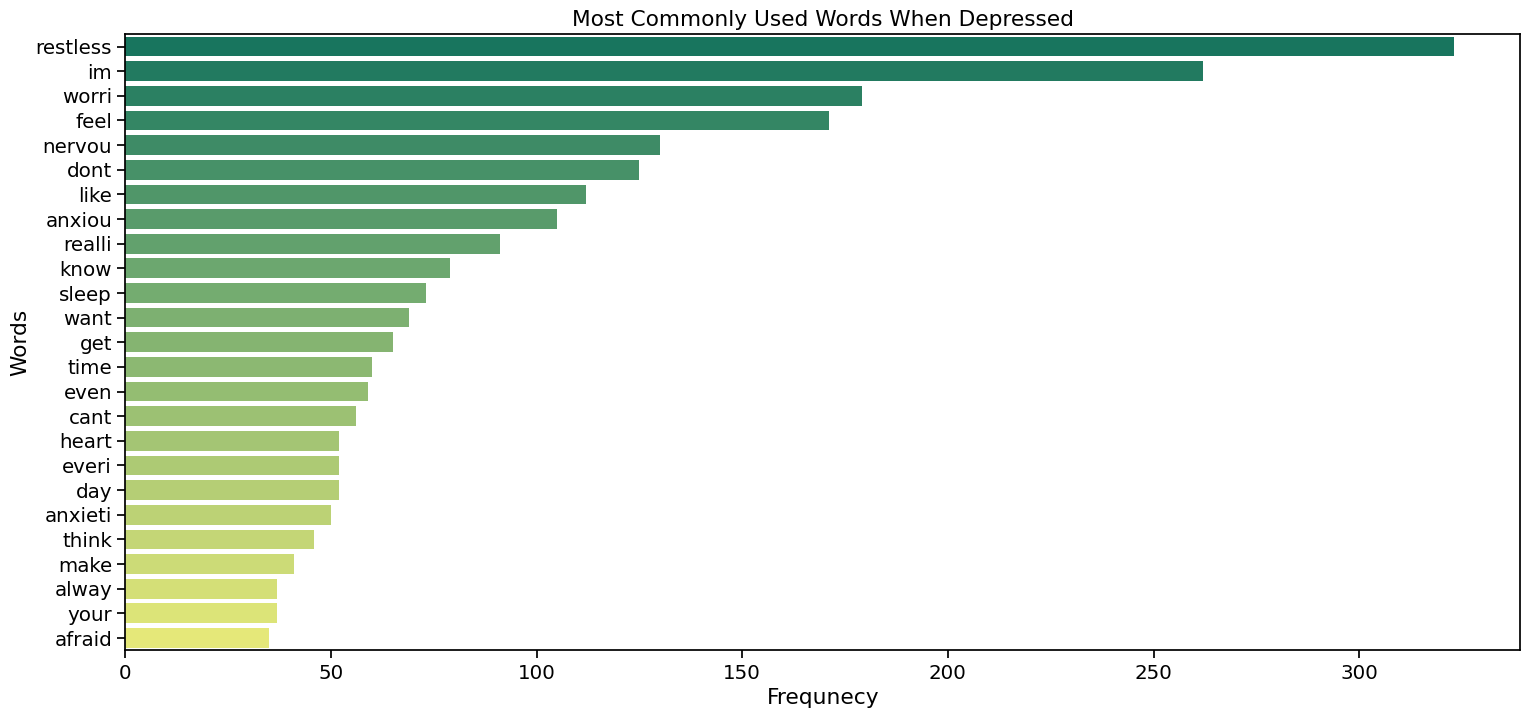

In [43]:
#This code snippet analyzes the text data where the label is equal to 1, identifies the most 
#common words, and visualizes their frequencies using a bar plot. 
#It provides insights into the most frequently used words when individuals are not depressed.
all_dep_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# Vectorization

In [44]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [45]:
#Spliting the data into training and testing pair
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [46]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

# Modeling

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [48]:
#Defining a function for Model Training

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

# 1. Naive Bayes

Accuracy of the model: 0.933
Precision Score of the model: 1.0
Recall Score of the model: 0.345


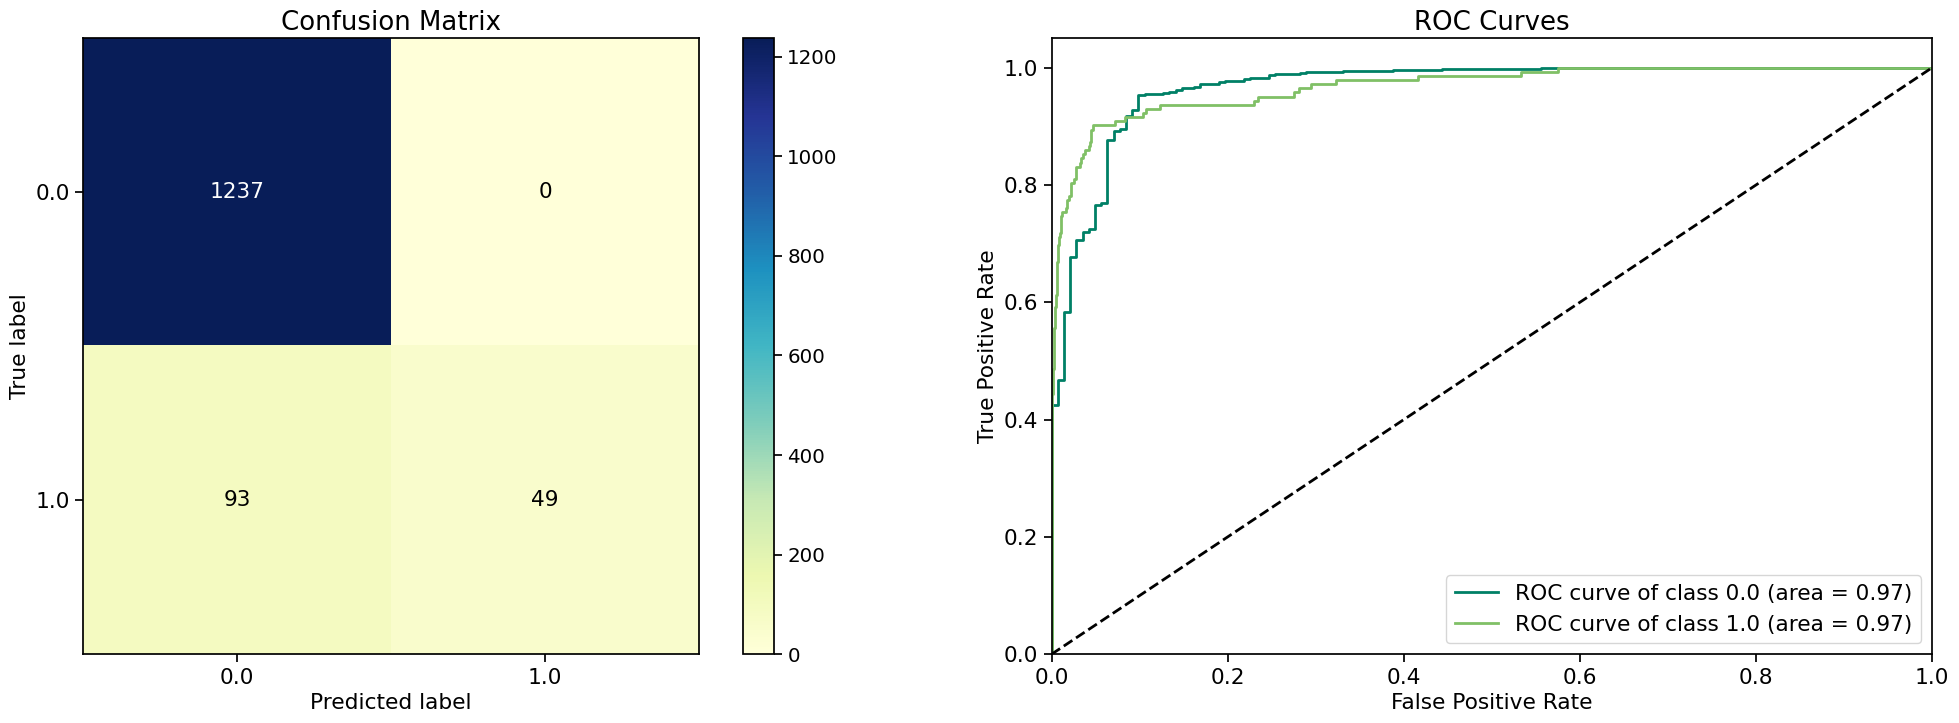

In [223]:
#Naive Bayes

nb = MultinomialNB()
train_model(nb)

# 2. Random Forest

Accuracy of the model: 0.99
Precision Score of the model: 0.978
Recall Score of the model: 0.923


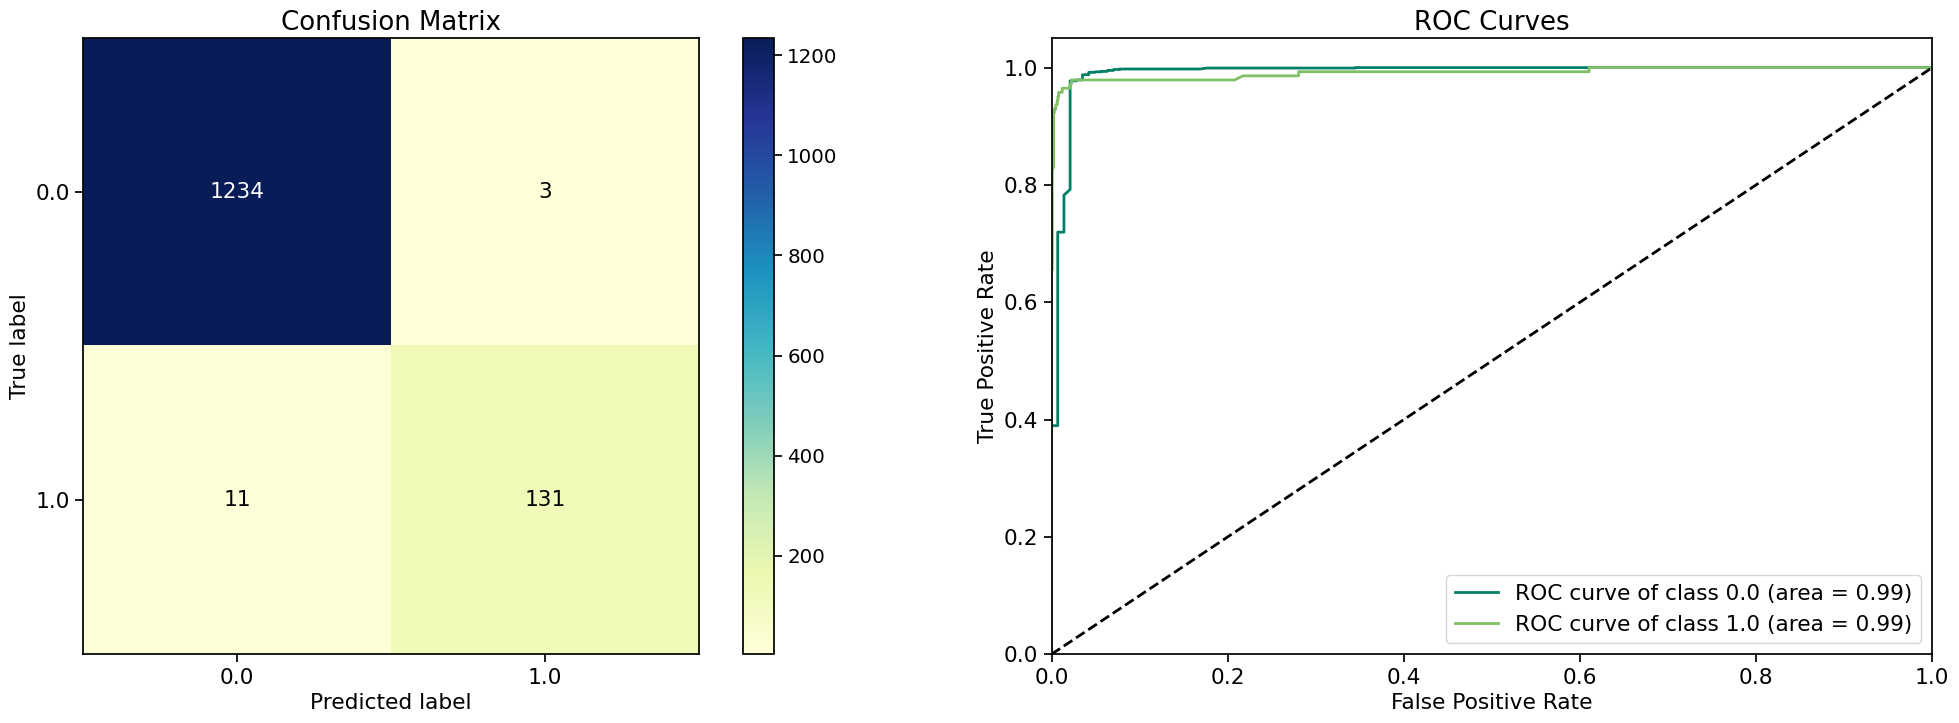

In [224]:
#Random Forest

rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

**Random Forest seems to be better!**

In [168]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))